<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Algorithm
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/16.%20KNN%20Algorithm/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20KNN%20Algorithm.pdf)

# 예제 1
- opencv

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 각 데이터의 위치: 25 X 2 크기에 각각 0 ~ 100
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# 각 데이터는 0 or 1
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

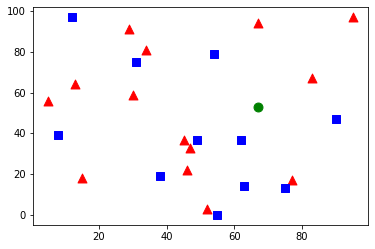

In [22]:
# 값이 0인 데이터를 각각 (x, y) 위치에 빨간색으로 칠합니다.
red = trainData[response.ravel() == 0] # response의값이 0인 인덱스를 trainData에 대입
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

# 값이 1인 데이터를 각각 (x, y) 위치에 파란색으로 칠합니다.
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치의 데이터를 하나 생성해 칠합니다.
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

In [4]:
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3) # 녹색원으로부터 일정범위안에  가장가까운 3개의 데이터를 확인

In [5]:
# 가까운 3개를 찾고, 거리를 고려하여 자신을 정합니다.
print("result : ", results) # 녹색원이 0 또는 1에 해당하는지 결과
print("neighbours :", neighbours) # 녹색원 주변 가까운 3개의 데이터
print("distance: ", dist) # 녹색원으로부터 3개 데이터의 각 거리값

plt.show()

result :  [[1.]]
neighbours : [[0. 1. 1.]]
distance:  [[ 89. 157. 185.]]


# 예제2
- sklearn
- 참고: https://blog.naver.com/baek2sm/221763552440
        https://www.youtube.com/watch?v=nKh3s19Yxwc&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=67

In [6]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split # traindata와 testdata분리를 위함
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
import pandas as pd
 
# 분류용 샘플 데이터 불러오기 
iris = load_iris() 
X, y, labels = iris.data, iris.target, iris.target_names 
df = pd.DataFrame(iris.data)
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 데이터 전처리
정규화
- fit_transform
      fit()한 다음에 transform() 하는 것입니다
      fit()이란 평균 𝜇과  표준편차 𝜎를 계산하는 작업
      transform이란 정규화 즉, 통계에서 정규분포를 만들게 하기 위해서 " (x - 평균) / 표준편차 " 연산을 한다

train_test_split

- test_size: 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미입니다.
- shuffle: default=True 입니다. split을 해주기 이전에 섞을건지 여부입니다.
- stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
- 참고: https://teddylee777.github.io/scikit-learn/train-test-split

스케일링의 종류

- StandardScaler
      기본 스케일. 평균과 표준편차 사용
      평균을 제거하고 데이터를 단위 분산으로 조정한다. 
      그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.
      따라서 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다

- MinMaxScaler
      최대/최소값이 각각 1, 0이 되도록 스케일링
      모든 feature 값이 0~1사이에 있도록 데이터를 재조정한다. 
      다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다.
      즉, MinMaxScaler 역시 아웃라이어의 존재에 매우 민감하다.

- MaxAbsScaler
      최대절대값과 0이 각각 1, 0이 되도록 스케일링
      절대값이 0~1사이에 매핑되도록 한다. 
      즉 -1~1 사이로 재조정한다. 
      양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 유사하게 동작하며, 큰 이상치에 민감할 수 있다.

- RobustScaler
      중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
      아웃라이어의 영향을 최소화한 기법이다. 
      중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.
      IQR = Q3 - Q1 : 즉, 25%에서부터 75%범위안의 값들을 다룬다.

- 참고: https://mkjjo.github.io/python/2019/01/10/scaler.html


In [24]:
# 학습/테스트 데이터셋 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)  # train과 test data분리

std = StandardScaler() 
X_train_std = std.fit_transform(X_train) 
X_test_std = std.transform(X_test)

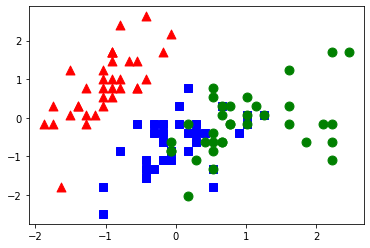

In [21]:
# 그래프
red = X_train_std[y_train.ravel() == 0] # y_train의 값이 0인 인덱스를 X_train_std에 대입
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
blue = X_train_std[y_train.ravel() == 1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')
green = X_train_std[y_train.ravel() == 2]
plt.scatter(green[:, 0], green[:,1], 80, 'g', 'o')

모델 학습
- KNN + 그리드서치로 모델 학습
- k값등 을 임의로 선택하기 보단 GridSearchCV를 통해 하이퍼파라미터의 최적의 값을 찾아내는것이 좋다 

In [9]:
knn = KNeighborsClassifier() 
param_grid = [{'n_neighbors': range(3, 10)}]  # n_neighbors를 3,4,5,6,7,8,9,10중 어느것이 가장좋은 설정값인지 찾게한다
gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1) 
gs.fit(X_train_std, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': range(3, 10)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [10]:
# 그리드서치 학습 결과 출력 
print(gs.best_params_) # 3~10 까지의 입력값중 가장 좋은 K값 출력
print(gs.best_score_) # 가장좋은 하이퍼파라미터 사용시 정확도 
model = gs.best_estimator_ # 최적화 모델

{'n_neighbors': 8}
0.9619047619047618


Test data

In [11]:
score = model.score(X_test_std, y_test) # 최적화 모델을 적용하여 Test값 정확도 산출
print('Test accuracy: {0:.2f}'.format(score)) 

predicted_y = model.predict(X_test_std)    # 최적화 모델을 적용하여 Test값 predict
for i in range(10): 
    print('실제 값: {0}, 예측 값: {1}'.format(labels[y_test[i]], labels[predicted_y[i]])) 

Test accuracy: 0.93
실제 값: virginica, 예측 값: virginica
실제 값: setosa, 예측 값: setosa
실제 값: setosa, 예측 값: setosa
실제 값: virginica, 예측 값: versicolor
실제 값: versicolor, 예측 값: versicolor
실제 값: versicolor, 예측 값: versicolor
실제 값: virginica, 예측 값: virginica
실제 값: versicolor, 예측 값: versicolor
실제 값: virginica, 예측 값: virginica
실제 값: setosa, 예측 값: setosa
